In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor


# Reading the data

In [2]:
#Reading all the datasets
df1 = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df2 = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
df3 = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
df4 = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
df5 = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
df6 = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
df7 = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
df8 = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df9 = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
df10 = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
df11 = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
df12 = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")

Merging the datasets:

In [3]:
#merging the datasets using concat function
df_merged = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

In [4]:
df_merged.head(3)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin


In [5]:
df_merged = df_merged.sample(frac = 0.10)

In [6]:
df_merged = df_merged.rename(columns = {"TEMP":"temp","PRES":"pres","DEWP":"dew_point_temp","RAIN":"rain","wd":"wind_direction","WSPM":"wind_speed"})

In [7]:
#converting to categorical variables
df_merged.year = df_merged.year.astype('category')
df_merged.month = df_merged.month.astype('category')
df_merged.day = df_merged.day.astype('category')
df_merged.hour = df_merged.hour.astype('category')
df_merged.wind_direction = df_merged.wind_direction.astype('category')
df_merged.station = df_merged.station.astype('category')

# Checking for null values

In [8]:
#dropping unnecessary column
df_merged = df_merged.drop('No',axis=1)

In [9]:
df_merged.isnull().sum()

year                 0
month                0
day                  0
hour                 0
PM2.5              895
PM10               682
SO2                936
NO2               1206
CO                2103
O3                1330
temp                48
pres                48
dew_point_temp      48
rain                46
wind_direction     185
wind_speed          39
station              0
dtype: int64

In [10]:
df_merged = df_merged.dropna()

Dropping NAN values as they constitute to less than 10% of the dataset and we can afford losing them when we compare to our dataset size. 

# 1

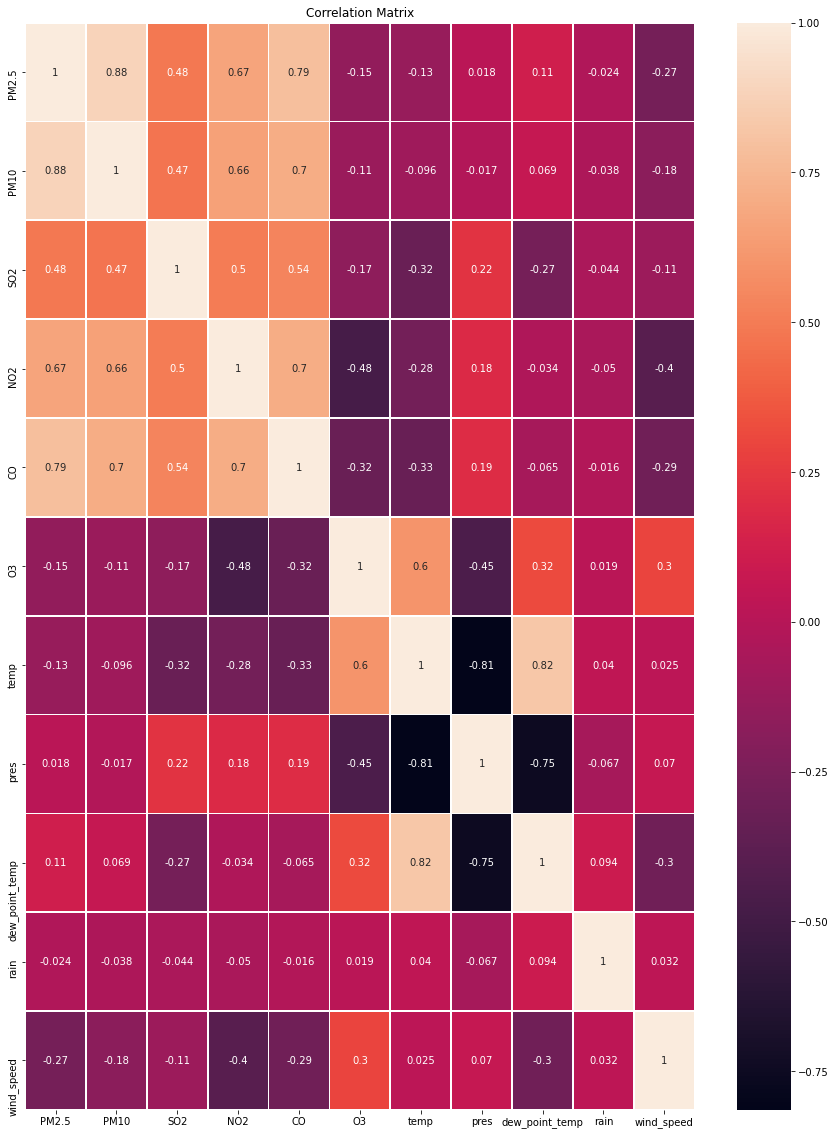

In [11]:
#checking the relation between independent variables
plt.figure(figsize=(15, 20))
plt.title('Correlation Matrix')
sns.heatmap(df_merged.corr(), annot=True, linewidth = 0.75)
plt.show()

Temp is highly correlated with pres and dew_point_temp as the correlation coefficient is more than 0.8.

In [12]:
df_merged.drop(columns = ['temp'],inplace = True)

Removing the highly correlated variable as the correlation was more than 0.8

In [13]:
Q1=df_merged['PM2.5'].quantile(0.25)
Q3=df_merged['PM2.5'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
df_out=pd.DataFrame()
df_out=df_merged[(df_merged['PM2.5']<(Q1-1.5*IQR))|(df_merged['PM2.5']>(Q3+1.5*IQR))]
print(df_out.shape)
df_merged=df_merged[~((df_merged['PM2.5']<(Q1-1.5*IQR))|(df_merged['PM2.5']>(Q3+1.5*IQR)))]
df_merged.shape

89.0
(1896, 16)


(36351, 16)

In [14]:
df_merged.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'pres', 'dew_point_temp', 'rain', 'wind_direction', 'wind_speed',
       'station'],
      dtype='object')

In [15]:
#reindexing to make sure PM2.5 is the last column
df_merged = df_merged.reindex(columns = ['year', 'month', 'day', 'hour','PM10', 'SO2', 'NO2', 'CO',
       'O3', 'pres', 'dew_point_temp', 'rain', 'wind_direction',
       'wind_speed', 'station', 'PM2.5'])

# Splitting the dataset into train and test sets

In [16]:
#splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_merged.iloc[:,0:15], df_merged.iloc[:,-1],stratify = df_merged['station'], test_size=0.3, shuffle = True)

In [17]:
#checking the split
print(df_merged["station"].value_counts()/len(df_merged))
print(X_train["station"].value_counts()/len(X_train))
print(X_test["station"].value_counts()/len(X_test))

Changping        0.087480
Tiantan          0.086573
Gucheng          0.084674
Guanyuan         0.084674
Nongzhanguan     0.084234
Wanshouxigong    0.084179
Aotizhongxin     0.084042
Huairou          0.083629
Dingling         0.082226
Shunyi           0.080025
Wanliu           0.079805
Dongsi           0.078457
Name: station, dtype: float64
Changping        0.087483
Tiantan          0.086579
Gucheng          0.084692
Guanyuan         0.084692
Nongzhanguan     0.084221
Wanshouxigong    0.084182
Aotizhongxin     0.084024
Huairou          0.083631
Dingling         0.082217
Shunyi           0.080016
Wanliu           0.079819
Dongsi           0.078444
Name: station, dtype: float64
Changping        0.087475
Tiantan          0.086558
Gucheng          0.084632
Guanyuan         0.084632
Nongzhanguan     0.084266
Wanshouxigong    0.084174
Aotizhongxin     0.084082
Huairou          0.083624
Dingling         0.082248
Shunyi           0.080048
Wanliu           0.079773
Dongsi           0.078489
Name

In [18]:
X_train.dtypes

year              category
month             category
day               category
hour              category
PM10               float64
SO2                float64
NO2                float64
CO                 float64
O3                 float64
pres               float64
dew_point_temp     float64
rain               float64
wind_direction    category
wind_speed         float64
station           category
dtype: object

In [19]:
#encoding all the categorical variables:
le = LabelEncoder()

#Train set scaling
X_train["station"] = le.fit_transform(X_train["station"])
X_test["station"]= le.transform(X_test["station"])

X_train["year"] = le.fit_transform(X_train["year"])
X_test["year"]= le.transform(X_test["year"])

X_train["month"] = le.fit_transform(X_train["month"])
X_test["month"]= le.transform(X_test["month"])

X_train["day"] = le.fit_transform(X_train["day"])
X_test["day"]= le.transform(X_test["day"])

X_train["hour"] = le.fit_transform(X_train["hour"])
X_test["hour"]= le.transform(X_test["hour"])


X_train["wind_direction"] = le.fit_transform(X_train["wind_direction"])
X_test["wind_direction"]= le.transform(X_test["wind_direction"])



Label encoding year, month, day and hour as they are integers but they should be treated as categories in the aspect of this dataset.

In [20]:
#checking the train set
X_train.head(3)

,year,month,day,hour,PM10,SO2,NO2,CO,O3,pres,dew_point_temp,rain,wind_direction,wind_speed,station
27952,3,4,7,16,111.0,14.0,21.0,700.0,171.0,1001.2,9.1,0.0,11,4.5,5
18711,2,3,18,15,82.0,2.0,15.0,200.0,109.0,1009.6,-10.6,0.0,15,1.1,4
24603,2,11,20,3,157.0,10.0,60.0,3200.0,2.0,1016.8,-7.7,0.0,6,1.3,2


In [21]:
#checking the test set
X_test.head(3)

,year,month,day,hour,PM10,SO2,NO2,CO,O3,pres,dew_point_temp,rain,wind_direction,wind_speed,station
33349,3,11,18,13,194.0,43.0,102.0,3400.0,13.0,1019.7,-5.8,0.0,10,0.5,3
23423,2,10,0,23,154.0,6.0,104.0,1800.0,2.0,1017.3,2.4,0.0,1,0.7,4
17235,2,1,16,3,17.0,11.0,22.0,400.0,62.0,1019.0,-11.0,0.0,1,1.3,9


In [22]:
#Scaling the features


X_train_cat = X_train[['year','month','day','hour','wind_direction','station']]
X_test_cat = X_test[['year','month','day','hour','wind_direction','station']]

scaler = StandardScaler()
standardized_numeric_data = scaler.fit_transform(X_train.drop(columns=['year','month','day','hour','wind_direction','station']))
X_train_final = np.concatenate((standardized_numeric_data,np.array(X_train_cat)),axis=1)
standardized_numeric_data = scaler.transform(X_test.drop(columns=['year','month','day','hour','wind_direction','station']))
X_test_final = np.concatenate((standardized_numeric_data,np.array(X_test_cat)),axis=1)



# Modelling

In [23]:
#model fitting
sgd = SGDRegressor(max_iter = 5000,random_state = 42)
sgd.fit(X_train_final,y_train)

SGDRegressor(max_iter=5000, random_state=42)

In [24]:
y_predict = sgd.predict(X_test_final)
rmse = sqrt(mean_squared_error(y_test,y_predict))
print('Root mean squared error is',rmse)

Root mean squared error is 27.988105245820044


In [59]:
mae = mean_absolute_error(y_test,y_predict)
mae

19.851602741576464

Choosing RMSE for regression problems is reasonable as we get the picture of error between the target and predicted values. RMSE is better than MSE and MAE because it penalizes more on large errors

In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'alpha':[0.00000001,0.000001,.00001,0.0001,0.001,0.01,0.1,0.2,0.3],'loss': ['squared_loss','huber'],'max_iter': [1000,5000,10000,15000,20000],
               }]
grid_search = GridSearchCV(sgd,param_grid,cv=5,scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_final,y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(max_iter=5000, random_state=42),
             param_grid=[{'alpha': [1e-08, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                    0.1, 0.2, 0.3],
                          'loss': ['squared_loss', 'huber'],
                          'max_iter': [1000, 5000, 10000, 15000, 20000]}],
             scoring='neg_mean_squared_error')

In [62]:
grid_search.best_params_

{'alpha': 0.1, 'loss': 'squared_loss', 'max_iter': 1000}

In [67]:
sgd = SGDRegressor(alpha=0.1,loss = 'squared_loss',max_iter = 1000)
sgd.fit(X_train_final,y_train)
from math import sqrt
y_predict = sgd.predict(X_test_final)
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(y_test,y_predict))
print('mean squared error is',rmse)

mean squared error is 27.462847644711346


In hyper parameter tuning, I have given multiple values for alpha,loss function and learning rate. We can tweak these values to get the optimal parameters for our model.

After doing the grid search, rmse got decrease to 27.96 from 27.46. It seems like insignificant but we did this only on the 10% of the dataset, For the whole dataset, it will be more significant and yield a better value.